In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("bank-additional.csv",sep=";")

In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [36]:
col_names = df.columns

In [37]:
df["y"].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [38]:
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
numeric_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [39]:
cat_cols = df.select_dtypes(include='object').columns

cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

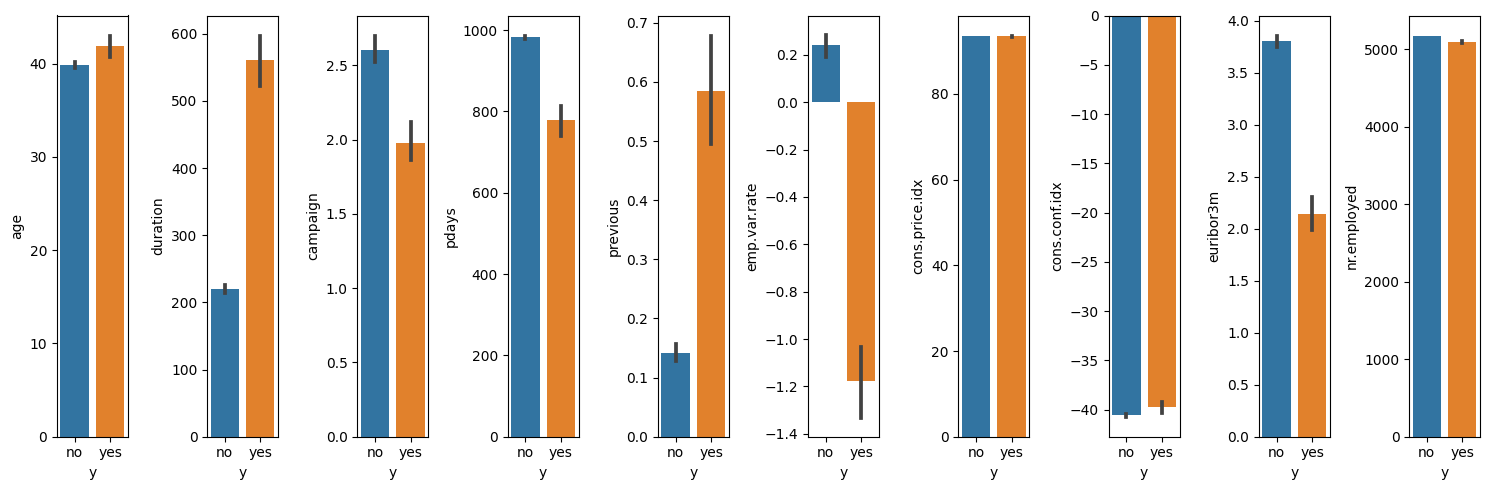

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    sns.barplot(x=df['y'], y=df[col], ax=axes[i])
    axes[i].set_xlabel('y')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

ordinal değişkenlerde sıra önemlidir.
the order is important For ordinal variables.

In [41]:
df['poutcome'] = df['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
df['poutcome'].value_counts()

 0    3523
-1     454
 1     142
Name: poutcome, dtype: int64

In [42]:
df['default'] = df['default'].map({'yes': -1,'unknown': 0,'no': 1})
df['default'].value_counts()

 1    3315
 0     803
-1       1
Name: default, dtype: int64

In [43]:
df['housing'] = df['housing'].map({'yes': -1,'unknown': 0,'no': 1})
df['loan'] = df['loan'].map({'yes': -1,'unknown': 0,'no': 1})

Nominal değişkenlerde sıra önemli değildir. One-Hot Encoding yapabiliriz.
Order is not important for nominal variables. We can use One-Hot Encoding.


In [44]:
nominal = ['job','marital','education','contact','month','day_of_week']
df = pd.get_dummies(df,columns=nominal)
df['y']=df['y'].map({'yes': 1,'no': 0})
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30,1,-1,1,487,2,999,0,0,-1.8,...,0,1,0,0,0,1,0,0,0,0
1,39,1,1,1,346,4,999,0,0,1.1,...,0,1,0,0,0,1,0,0,0,0
2,25,1,-1,1,227,1,999,0,0,1.4,...,0,0,0,0,0,0,0,0,0,1
3,38,1,0,0,17,3,999,0,0,1.4,...,0,0,0,0,0,1,0,0,0,0
4,47,1,-1,1,58,1,999,0,0,-0.1,...,0,0,1,0,0,0,1,0,0,0


## TRAIN - TEST

In [45]:
X = df.drop(['y'], axis=1)
y = df['y']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Scale

In [46]:
cols = X_train.columns
X_train[numeric_cols]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3199,30,683,2,999,0,1.1,93.994,-36.4,4.856,5191.0
3258,42,1311,2,999,0,1.4,93.444,-36.1,4.968,5228.1
3153,48,82,1,999,0,-0.1,93.200,-42.0,4.191,5195.8
399,30,258,2,999,1,-0.1,93.200,-42.0,4.021,5195.8
1410,28,223,1,999,0,-1.8,92.893,-46.2,1.291,5099.1
...,...,...,...,...,...,...,...,...,...,...
1033,50,65,17,999,0,1.4,94.465,-41.8,4.961,5228.1
3264,45,21,3,999,0,1.4,93.918,-42.7,4.961,5228.1
1653,27,429,2,999,0,-2.9,92.201,-31.4,0.879,5076.2
2607,56,123,3,999,0,1.4,93.918,-42.7,4.962,5228.1


In [48]:
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()

X_train = sca.fit_transform(X_train)
X_test = sca.fit_transform(X_test)


In [49]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [50]:
X_train[cols]

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,-0.977249,0.491928,-0.917247,0.464636,1.653155,-0.195607,0.204284,-0.356918,0.200672,0.656694,...,-0.109444,1.418409,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
1,0.179962,0.491928,-0.917247,0.464636,4.089944,-0.195607,0.204284,-0.356918,0.200672,0.848657,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
2,0.758567,0.491928,-0.917247,0.464636,-0.678869,-0.587892,0.204284,-0.356918,0.200672,-0.111158,...,-0.109444,-0.705015,2.815944,-0.12413,-0.126628,-0.475204,1.944812,-0.510412,-0.512301,-0.487638
3,-0.977249,0.491928,1.118677,0.464636,0.004053,-0.195607,0.204284,1.495123,-2.444187,-0.111158,...,-0.109444,-0.705015,2.815944,-0.12413,-0.126628,2.104361,-0.514189,-0.510412,-0.512301,-0.487638
4,-1.170117,0.491928,1.118677,0.464636,-0.131755,-0.587892,0.204284,-0.356918,0.200672,-1.198948,...,-0.109444,1.418409,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,0.951435,-2.025002,1.118677,0.464636,-0.744833,5.688668,0.204284,-0.356918,0.200672,0.848657,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,1.944812,-0.510412,-0.512301,-0.487638
3291,0.469264,-2.025002,-0.917247,-2.252268,-0.915563,0.196678,0.204284,-0.356918,0.200672,0.848657,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
3292,-1.266551,0.491928,-0.917247,0.464636,0.667574,-0.195607,0.204284,-0.356918,0.200672,-1.902812,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,-0.512301,2.050700
3293,1.530041,0.491928,-0.917247,-2.252268,-0.519779,0.196678,0.204284,-0.356918,0.200672,0.848657,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,1.944812,-0.510412,-0.512301,-0.487638


# DECISION Tree Classifier 

In [51]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0): An object is created from the DecisionTreeClassifier class and assigned to the variable clf_gini. The parameter criterion='gini' specifies that the decision tree will use the Gini impurity criterion to measure the quality of splits. The parameter max_depth=3 limits the maximum depth of the tree to 3. The parameter random_state=0 fixes the random state to obtain consistent results across runs.

In [53]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [54]:
y_pred_gini = clf_gini.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

print('Modelimiz için Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Modelimiz için Accuracy Score: 0.8968


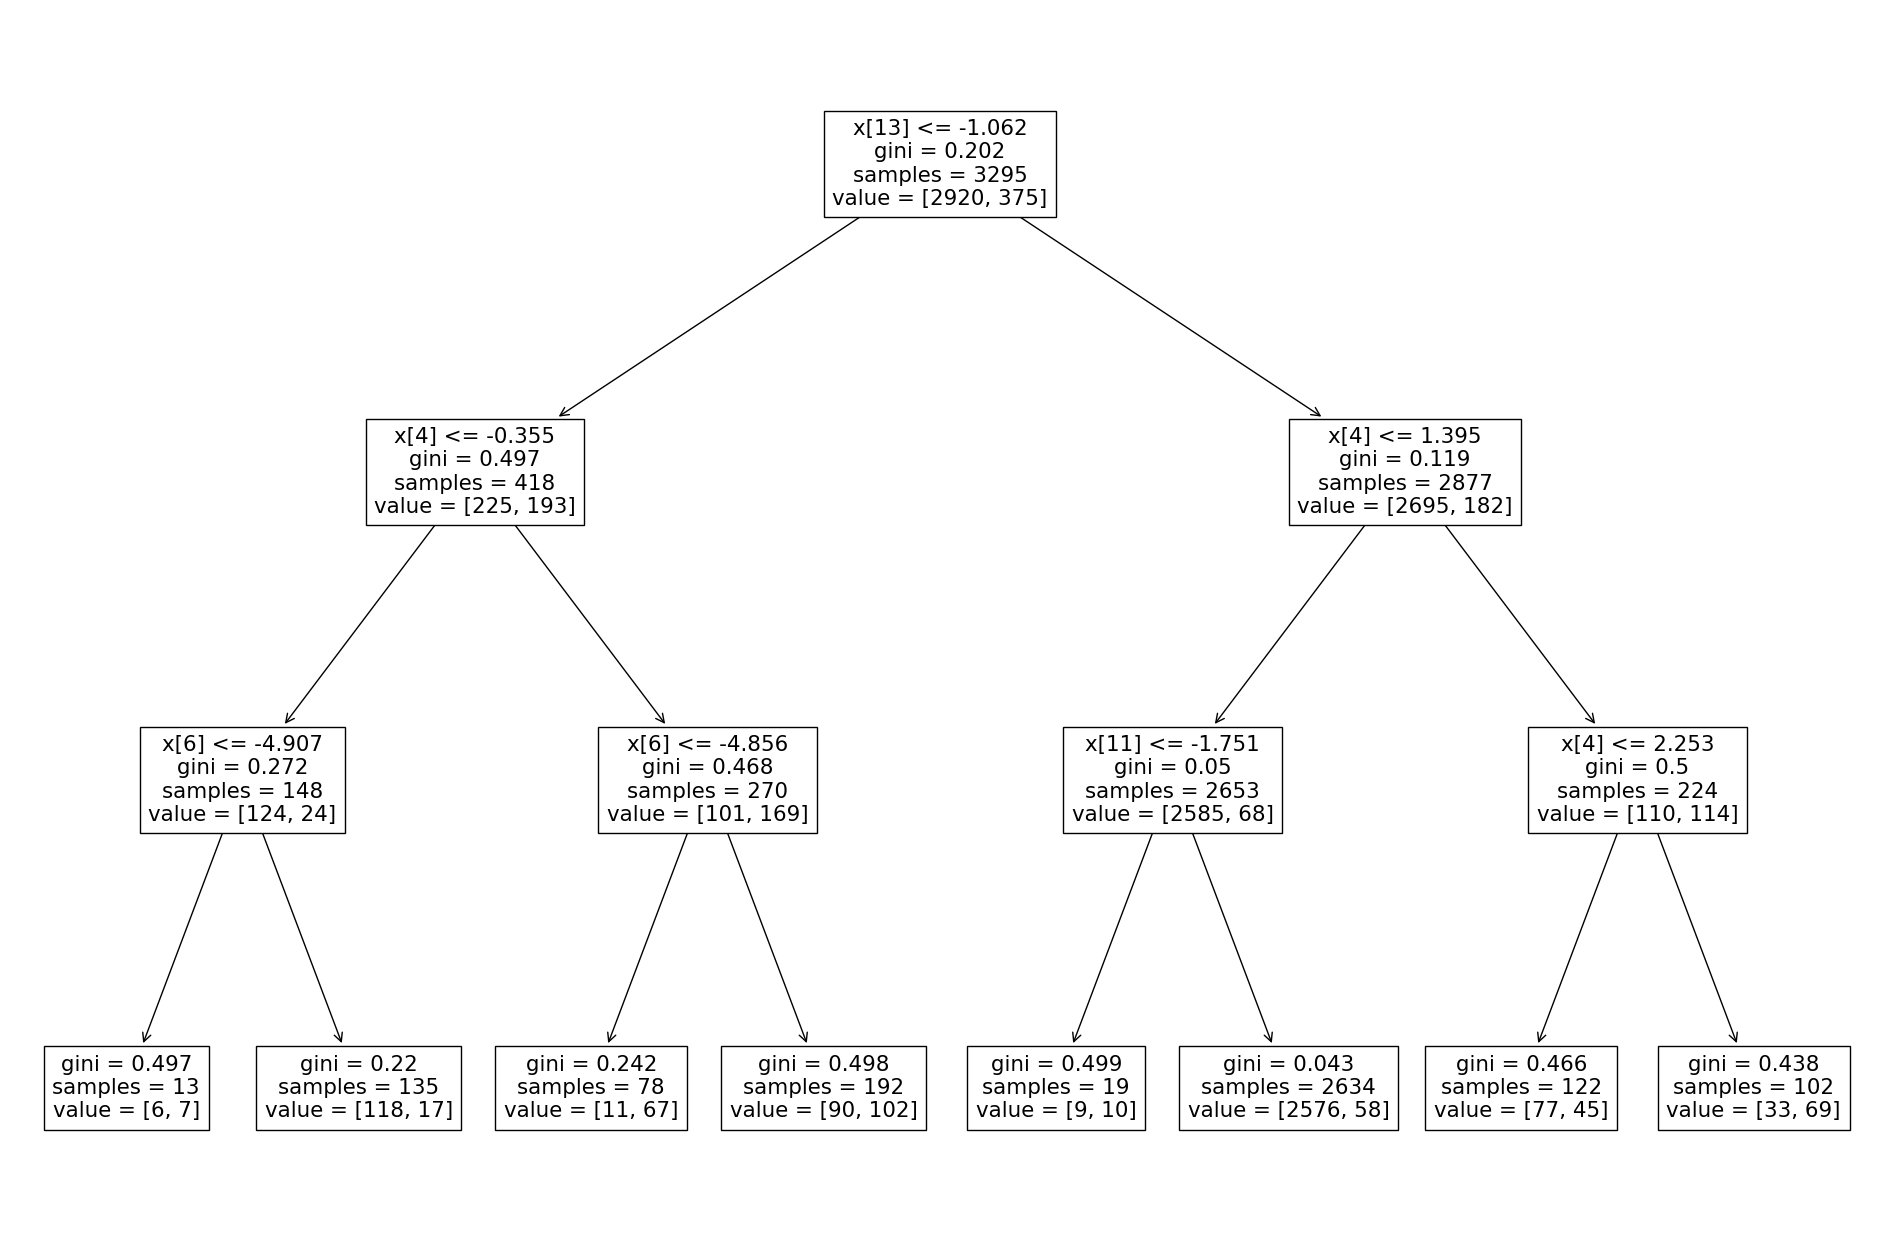

In [56]:
plt.figure(figsize=(24,16))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

plt.show()

## Decision tree classifier with entropy

Gini impurity and entropy serve the same purpose of measuring the homogeneity or disorder of class distributions in a node. The main differences lie in the calculation methods and mathematical expressions. Gini impurity is calculated by subtracting the sum of squared class probabilities from 1, while entropy is calculated using class probabilities.

In [57]:
clf_ent = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# model'i fit edelim
clf_ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [58]:
y_pred_ent = clf_ent.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

print('Modelimiz için Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_ent)))

Modelimiz için Accuracy Score: 0.8993


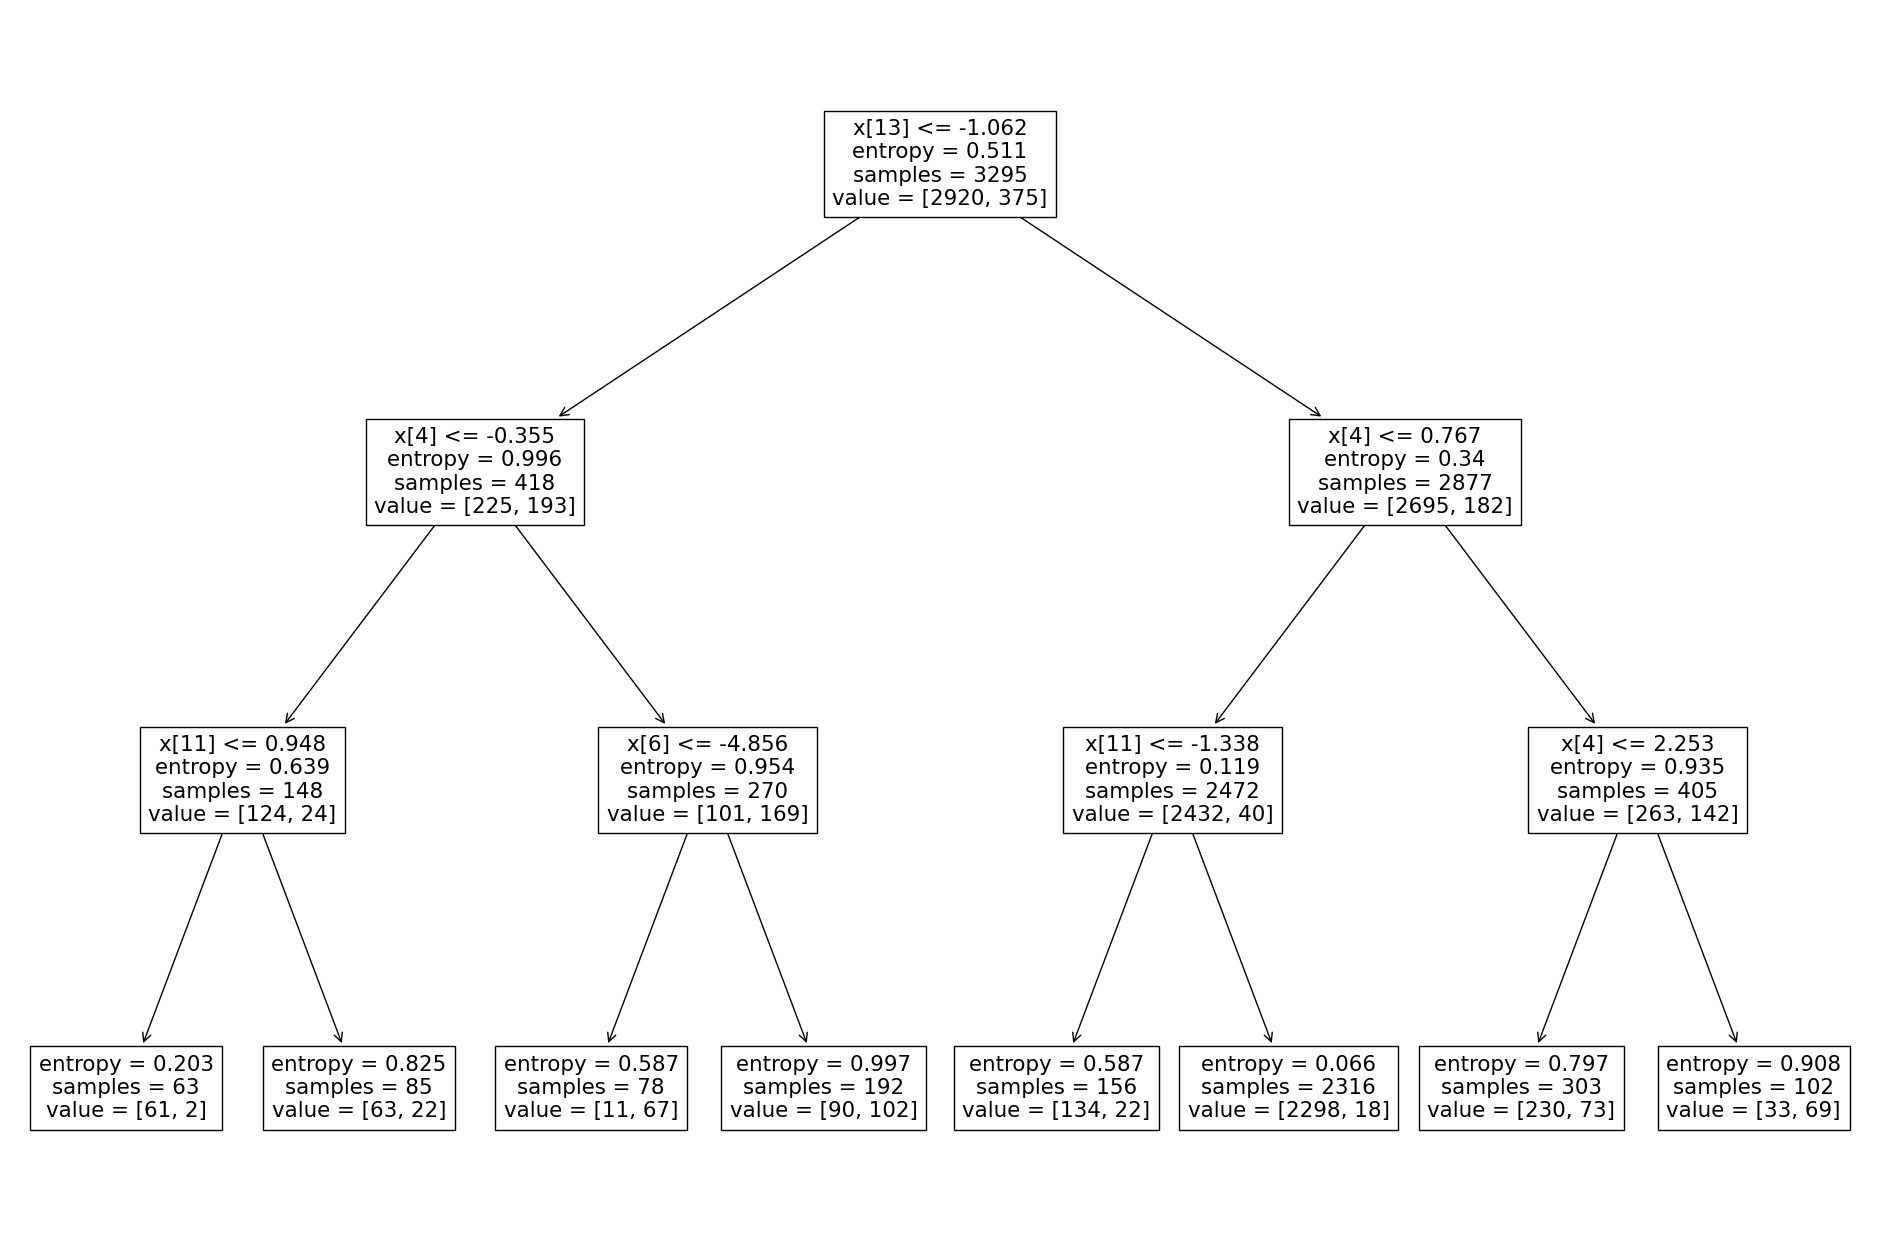

In [60]:
plt.figure(figsize=(24,16))

from sklearn import tree

tree.plot_tree(clf_ent.fit(X_train, y_train)) 

plt.show()